In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Running a basic session

tf.reset_default_graph()

m1 = tf.constant([[2,2]])
m2 = tf.constant([[3], 
                  [3]])
dot_operation = tf.matmul(m1, m2)

with tf.Session() as sess:
    result = sess.run(dot_operation)
    print(result[0][0])

12


In [3]:
# Placeholders

x1 = tf.placeholder(dtype=tf.float32, shape=None)
y1 = tf.placeholder(dtype=tf.float32, shape=None)
z1 = x1 + y1

x2 = tf.placeholder(dtype=tf.float32, shape=[2,1])
y2 = tf.placeholder(dtype=tf.float32, shape=[1,2])
z2 = tf.matmul(x2, y2)

with tf.Session() as sess:
    z1_val, z2_val = sess.run([z1, z2], feed_dict = {
                              x1: 1, y1: 2,
                              x2: [[2], [2]],
                              y2: [[3, 3]]})
    print(z1_val)
    print(z2_val)

3.0
[[6. 6.]
 [6. 6.]]


In [4]:
# Variables

var = tf.Variable(0)

add_operation = tf.add(var, 1)
update_operation = tf.assign(var, add_operation)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for _ in range(3):
        sess.run(update_operation)
        print(sess.run(var))

1
2
3


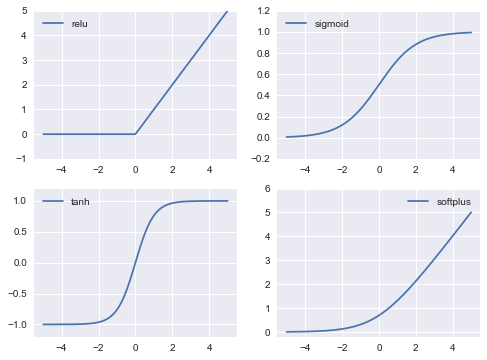

In [5]:
# Activation Funtions

x = np.linspace(-5, 5, 200)

y_relu = tf.nn.relu(x)
y_sigmoid = tf.nn.sigmoid(x)
y_tanh = tf.nn.tanh(x)
y_softplus = tf.nn.softplus(x)

with tf.Session() as sess:
    y_relu, y_sigmoid, y_tanh, y_softplus = sess.run([y_relu, y_sigmoid, y_tanh, y_softplus])
    
plt.figure(1, figsize=(8,6))

plt.subplot(221)
plt.plot(x, y_relu, label='relu')
plt.ylim((-1, 5))
plt.legend(loc='best')

plt.subplot(222)
plt.plot(x, y_sigmoid, label='sigmoid')
plt.ylim((-0.2, 1.2))
plt.legend(loc='best')

plt.subplot(223)
plt.plot(x, y_tanh, label='tanh')
plt.ylim((-1.2, 1.2))
plt.legend(loc='best')

plt.subplot(224)
plt.plot(x, y_softplus, label='softplus')
plt.ylim((-0.2, 6))
plt.legend(loc='best')

plt.show()

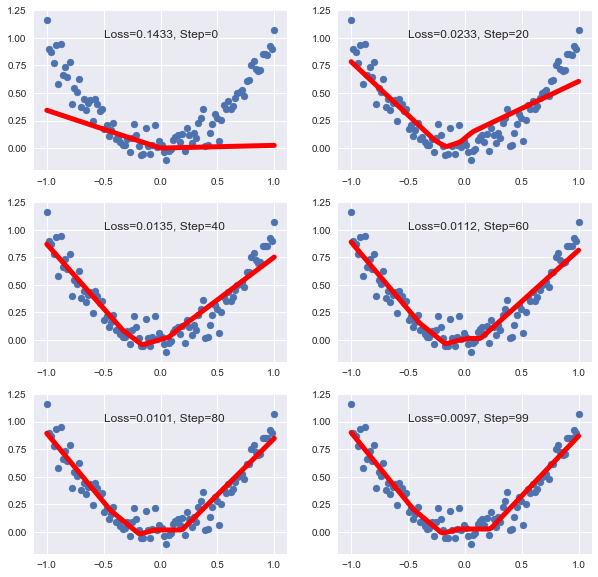

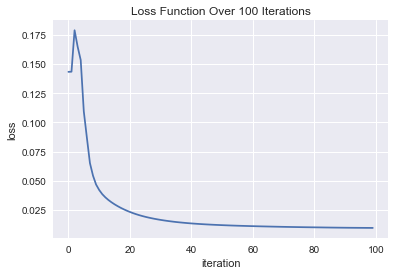

In [6]:
# Regression

import seaborn

tf.set_random_seed(1)
np.random.seed(1)

x = np.linspace(-1, 1, 100)[:, np.newaxis]
noise = np.random.normal(0, 0.1, size=x.shape)
y = np.power(x, 2) + noise

tf_x = tf.placeholder(tf.float32, x.shape)
tf_y = tf.placeholder(tf.float32, y.shape)

# nn layers
l1 = tf.layers.dense(tf_x, 10, tf.nn.relu)
output = tf.layers.dense(l1, 1)

loss = tf.losses.mean_squared_error(tf_y, output)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train_op = optimizer.minimize(loss)

loss_vals = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    plt.ion()
    plt.figure(1, figsize=(10,10))
    subplot_num = 321
    
    for step in range(100):
        _, l, pred = sess.run([train_op, loss, output], feed_dict={tf_x: x, tf_y: y})
        loss_vals.append(l)
        if step % 20 == 0 or step == 99:
            plt.subplot(subplot_num)
            plt.scatter(x,y)
            plt.plot(x, pred, 'r-', lw=5)
            plt.text(-0.5, 1, 'Loss={:.4f}, Step={}'.format(l, step), fontdict={'size':12})
            #plt.pause(0.1)
            subplot_num += 1
    
    plt.ioff()
    plt.show()

plt.plot(range(100), loss_vals)
plt.title('Loss Function Over 100 Iterations')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

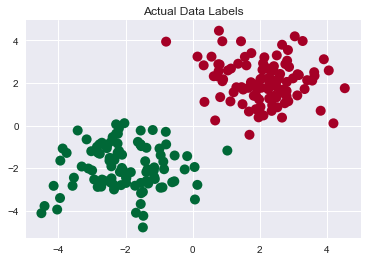

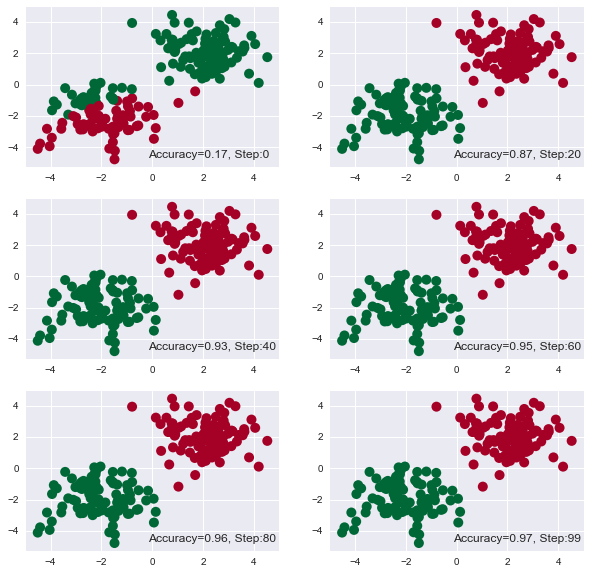

In [7]:
# Classification

n_data = np.ones((100,2))
x0 = np.random.normal(2*n_data, 1)
y0 = np.zeros(100)
x1 = np.random.normal(-2*n_data, 1)
y1 = np.ones(100)
x = np.vstack((x0, x1))
y = np.hstack((y0, y1))

plt.scatter(x[:, 0], x[:, 1], c=y, s=100, lw=0, cmap='RdYlGn')
plt.title('Actual Data Labels')
plt.show()

tf_x = tf.placeholder(tf.float32, x.shape)
tf_y = tf.placeholder(tf.int32, y.shape)

l1 = tf.layers.dense(tf_x, 10, tf.nn.relu)
output = tf.layers.dense(l1, 2)

loss = tf.losses.sparse_softmax_cross_entropy(labels=tf_y, logits=output)
accuracy = tf.metrics.accuracy(labels=tf.squeeze(tf_y), predictions=tf.argmax(output, axis=1),)[1]
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05)
train_op = optimizer.minimize(loss)

with tf.Session() as sess:
    init_op = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())
    sess.run(init_op)
    
    plt.ion()
    plt.figure(1, figsize=(10,10))
    subplot_num = 321
    
    for step in range(100):
        _, acc, pred = sess.run([train_op, accuracy, output], {tf_x: x, tf_y: y})
        if step % 20 == 0 or step == 99:
            plt.subplot(subplot_num)
            plt.scatter(x[:, 0], x[:, 1], c=pred.argmax(1), s=100, lw=0, cmap='RdYlGn')
            plt.text(-.16, -4.7, 'Accuracy={:.2f}, Step:{}'.format(acc, step), fontdict={'size': 12})
            subplot_num += 1

    plt.ioff()
    plt.show()

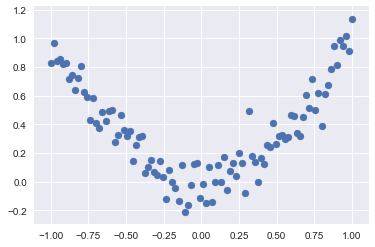

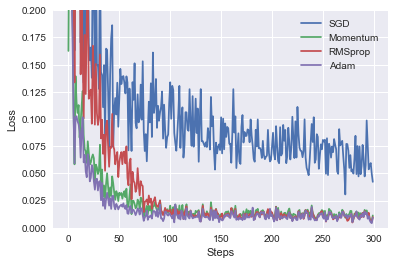

In [ ]:
# Comparing Optimizers

LR = 0.01
BATCH_SIZE = 32

x = np.linspace(-1, 1, 100)[:, np.newaxis]      
noise = np.random.normal(0, 0.1, size=x.shape)
y = np.power(x, 2) + noise          

# plot dataset
plt.scatter(x, y)
plt.show()

# default network
class Net:
    def __init__(self, opt, **kwargs):
        self.x = tf.placeholder(tf.float32, [None, 1])
        self.y = tf.placeholder(tf.float32, [None, 1])
        l = tf.layers.dense(self.x, 20, tf.nn.relu)
        out = tf.layers.dense(l, 1)
        self.loss = tf.losses.mean_squared_error(self.y, out)
        self.train = opt(LR, **kwargs).minimize(self.loss)

# different nets
net_SGD         = Net(tf.train.GradientDescentOptimizer)
net_Momentum    = Net(tf.train.MomentumOptimizer, momentum=0.9)
net_RMSprop     = Net(tf.train.RMSPropOptimizer)
net_Adam        = Net(tf.train.AdamOptimizer)
nets = [net_SGD, net_Momentum, net_RMSprop, net_Adam]

sess = tf.Session()
sess.run(tf.global_variables_initializer())

losses_his = [[], [], [], []]   # record loss

# training
for step in range(300):          # for each training step
    index = np.random.randint(0, x.shape[0], BATCH_SIZE)
    b_x = x[index]
    b_y = y[index]

    for net, l_his in zip(nets, losses_his):
        _, l = sess.run([net.train, net.loss], {net.x: b_x, net.y: b_y})
        l_his.append(l)     # loss recoder

# plot loss history
labels = ['SGD', 'Momentum', 'RMSprop', 'Adam']
for i, l_his in enumerate(losses_his):
    plt.plot(l_his, label=labels[i])
plt.legend(loc='best')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.ylim((0, 0.2))
plt.show()

Extracting ./mnist/train-images-idx3-ubyte.gz
Extracting ./mnist/train-labels-idx1-ubyte.gz
Extracting ./mnist/t10k-images-idx3-ubyte.gz
Extracting ./mnist/t10k-labels-idx1-ubyte.gz
(55000, 784)
(55000, 10)


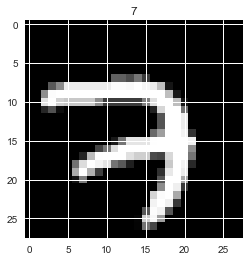

Step: 0 | train loss: 2.3109 | test accuracy: 0.09
Step: 50 | train loss: 0.6289 | test accuracy: 0.60


In [ ]:
# CNN

from tensorflow.examples.tutorials.mnist import input_data

BATCH_SIZE = 50
LR = 0.001

mnist = input_data.read_data_sets('./mnist', one_hot=True)
test_x = mnist.test.images[:2000]
test_y = mnist.test.labels[:2000]

print(mnist.train.images.shape)
print(mnist.train.labels.shape)
plt.imshow(mnist.train.images[0].reshape((28,28)), cmap='gray')
plt.title('%i' % np.argmax(mnist.train.labels[0]));
plt.show()

tf_x = tf.placeholder(tf.float32, [None, 28*28]) / 255.
image = tf.reshape(tf_x, [-1, 28, 28, 1])
tf_y = tf.placeholder(tf.int32, [None, 10])

# CNN
conv1 = tf.layers.conv2d(
    inputs=image,
    filters=16,
    kernel_size=5,
    strides=1,
    padding='same',
    activation=tf.nn.relu
)
pool1 = tf.layers.max_pooling2d(
    conv1,
    pool_size=2,
    strides=2
)
conv2 = tf.layers.conv2d(pool1, 32, 5, 1, 'same', activation=tf.nn.relu)
pool2 = tf.layers.max_pooling2d(conv2, 2, 2)
flat = tf.reshape(pool2, [-1, 7*7*32])
output = tf.layers.dense(flat, 10)

loss = tf.losses.softmax_cross_entropy(onehot_labels=tf_y, logits=output)
train_op = tf.train.AdamOptimizer(LR).minimize(loss)

accuracy = tf.metrics.accuracy(labels=tf.argmax(tf_y, axis=1), predictions=tf.argmax(output, axis=1),)[1]

# run session
with tf.Session() as sess:
    
    init_op = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer()) # the local var is for accuracy_op
    sess.run(init_op)     # initialize var in graph

    from matplotlib import cm
    try: from sklearn.manifold import TSNE; HAS_SK = True
    except: HAS_SK = False; print('\nPlease install sklearn for layer visualization\n')
    
    def plot_with_labels(lowDWeights, labels):
        plt.cla(); X, Y = lowDWeights[:, 0], lowDWeights[:, 1]
        for x, y, s in zip(X, Y, labels):
            c = cm.rainbow(int(255 * s / 9)); plt.text(x, y, s, backgroundcolor=c, fontsize=9)
        plt.xlim(X.min(), X.max()); plt.ylim(Y.min(), Y.max()); plt.title('Visualize last layer'); plt.show(); plt.pause(0.01)

    plt.ion()
    
    test_range = 1200
    loss_range = []
    acc_range  = []
    
    for step in range(test_range):
        b_x, b_y = mnist.train.next_batch(BATCH_SIZE)
        _, loss_ = sess.run([train_op, loss], {tf_x: b_x, tf_y: b_y})
        accuracy_, flat_representation = sess.run([accuracy, flat], {tf_x: test_x, tf_y: test_y})
        loss_range.append(loss_)
        acc_range.append(accuracy_)
        
        if step % 50 == 0 or step == test_range-1:
            print('Step:', step, '| train loss: %.4f' % loss_, '| test accuracy: %.2f' % accuracy_)

#             if HAS_SK:
#                 # Visualization of trained flatten layer (T-SNE)
#                 tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000); plot_only = 500
#                 low_dim_embs = tsne.fit_transform(flat_representation[:plot_only, :])
#                 labels = np.argmax(test_y, axis=1)[:plot_only] 
#                 plot_with_labels(low_dim_embs, labels)
    plt.ioff()

    # print 10 predictions from test data
    test_output = sess.run(output, {tf_x: test_x[:10]})
    pred_y = np.argmax(test_output, 1)
    print(pred_y, 'prediction number')
    print(np.argmax(test_y[:10], 1), 'real number')

plt.plot(range(test_range), loss_range)
plt.plot(range(test_range), acc_range)